# iLykei Lecture Series

# Machine Learning

# Main Deep Learning Models: RNN, LSTM

## Yuri Balasanov, &copy; iLykei 2017-2018

In [5]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
from os.path import expanduser

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN


# Structure of weights of RNN

Simple RNN layer implements expression
$$y_t,h_t = \tanh(b+Wh_{t-1}+Ux_t),$$
where: 
- $U$ is the matrix of input weights, it transforms input into output and has shape `(input_dim,output_dim)`
- $W$ is the matrix of recurrent weights, it transforms previous output into current output and thus has shape `(output_dim,output_dim)`
- $b$ is the bias matrix with shape `(output_dim)`

Regular RNN (not simple) has one additional step:
$$h_t = \tanh(b+Wh_{t-1}+Ux_t),$$
$$y_t = Vh_t+c=V \tanh(b+Wh_{t-1}+Ux_t)+c$$


Create a model with single simple RNN layer and check the weights.

In [2]:
neurons_n=3
input_shape=(None,2)
def make_bare_model():
    model = Sequential()
    model.add(SimpleRNN(units=neurons_n,activation='tanh', 
                        input_shape=input_shape,batch_input_shape=(1,input_shape[0],
                                                                   input_shape[1]),stateful=True))
    model.compile(loss='categorical_crossentropy',optimizer='sgd')
    return model
model_try=make_bare_model()
print(model_try.summary())
model_try_weights=np.array(model_try.layers[0].get_weights())
print('All weights:\n',model_try_weights)
print('Input matrix:\n',model_try_weights[0])
print('Recurrent matrix:\n',model_try_weights[1])
print('Bias matrix:\n',model_try_weights[2])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 3)                    18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
All weights:
 [array([[ 0.0036329 ,  0.24760675, -0.07379436],
       [ 0.2148124 , -1.0128299 ,  0.21640599]], dtype=float32)
 array([[-0.6289927 , -0.4746893 , -0.61566085],
       [ 0.41217065, -0.8750947 ,  0.25362307],
       [-0.6591537 , -0.09423026,  0.7460812 ]], dtype=float32)
 array([0., 0., 0.], dtype=float32)]
Input matrix:
 [[ 0.0036329   0.24760675 -0.07379436]
 [ 0.2148124  -1.0128299   0.21640599]]
Recurrent matrix:
 [[-0.6289927  -0.4746893  -0.61566085]
 [ 0.41217065 -0.8750947   0.25362307]
 [-0.6591537  -0.09423026  0.7460812 ]]
Bias matrix:
 [0. 0. 0.]


# Structure of weights LSTM

Create a simple LSTM model and observe the structure of its weights.

In [3]:
neurons_n=3
input_shape=(None,2)
def make_bare_lstm_model():
    model = Sequential()
    model.add(LSTM(units=neurons_n,activation='tanh', 
                        input_shape=input_shape,batch_input_shape=(1,input_shape[0],
                                                                   input_shape[1]),stateful=True))
    model.compile(loss='categorical_crossentropy',optimizer='sgd')
    return model
model_lstm_try=make_bare_lstm_model()
print(model_lstm_try.summary())
model_lstm_try_weights=np.array(model_lstm_try.layers[0].get_weights())
print('\nInput matrix:\n',model_lstm_try_weights[0])
print('Recurrent matrix:\n',model_lstm_try_weights[1])
print('Bias matrix:\n',model_lstm_try_weights[2])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 3)                    72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________
None

Input matrix:
 [[ 0.09987581  0.04818535  0.47523355 -0.5451496  -0.34556124  0.39227068
   0.02687883 -0.18375954  0.21594357  0.2707588  -0.5884687   0.4813627 ]
 [-0.53111726 -0.08449477 -0.10668939 -0.2999317  -0.08229977  0.57805884
   0.4809065  -0.4571057   0.4646417   0.24479777  0.3997848  -0.07164192]]
Recurrent matrix:
 [[ 0.19462246 -0.13423727  0.08535594 -0.08019165 -0.22493301 -0.62097245
   0.5558099   0.12547208 -0.17463772 -0.23599446  0.2650436   0.11435369]
 [-0.18725595  0.12314346 -0.18517064  0.5152012  -0.13010174 -0.12083872
  -0.23532706 -0.23285179  0.19849575 -0.22876768  0.62424076 -0.16586573]
 [-0.10352944  0.5115152  -0.1816591 

Again, there are 3 parts: input matrix, recurrent matrix and bias matrix. But this time each of them consists of 4 parts: inputs, forget, cell and output.

Print all of them separately:

In [4]:
W = model_lstm_try.layers[0].get_weights()[0]  # input
U = model_lstm_try.layers[0].get_weights()[1]  # recurrent
b = model_lstm_try.layers[0].get_weights()[2]  # bias

# i(nput), f(orget), c(ell), o(utput)

W_i = W[:, :neurons_n]
W_f = W[:, neurons_n: neurons_n * 2]
W_c = W[:, neurons_n * 2: neurons_n * 3]
W_o = W[:, neurons_n * 3:]

U_i = U[:, :neurons_n]
U_f = U[:, neurons_n: neurons_n * 2]
U_c = U[:, neurons_n * 2: neurons_n * 3]
U_o = U[:, neurons_n * 3:]

b_i = b[:neurons_n]
b_f = b[neurons_n: neurons_n * 2]
b_c = b[neurons_n * 2: neurons_n * 3]
b_o = b[neurons_n * 3:]

print('\nW_i:\n',W_i)
print('\nW_f:\n',W_f)
print('\nW_c:\n',W_c)
print('\nW_o:\n',W_o)

print('\nU_i:\n',U_i)
print('\nU_f:\n',U_f)
print('\nU_c:\n',U_c)
print('\nU_o:\n',U_o)

print('\nb_i:\n',b_i)
print('\nb_f:\n',b_f)
print('\nb_c:\n',b_c)
print('\nb_o:\n',b_o)


W_i:
 [[ 0.09987581  0.04818535  0.47523355]
 [-0.53111726 -0.08449477 -0.10668939]]

W_f:
 [[-0.5451496  -0.34556124  0.39227068]
 [-0.2999317  -0.08229977  0.57805884]]

W_c:
 [[ 0.02687883 -0.18375954  0.21594357]
 [ 0.4809065  -0.4571057   0.4646417 ]]

W_o:
 [[ 0.2707588  -0.5884687   0.4813627 ]
 [ 0.24479777  0.3997848  -0.07164192]]

U_i:
 [[ 0.19462246 -0.13423727  0.08535594]
 [-0.18725595  0.12314346 -0.18517064]
 [-0.10352944  0.5115152  -0.1816591 ]]

U_f:
 [[-0.08019165 -0.22493301 -0.62097245]
 [ 0.5152012  -0.13010174 -0.12083872]
 [-0.5024159   0.08262342 -0.02867596]]

U_c:
 [[ 0.5558099   0.12547208 -0.17463772]
 [-0.23532706 -0.23285179  0.19849575]
 [ 0.00738472  0.43924475  0.09694792]]

U_o:
 [[-0.23599446  0.2650436   0.11435369]
 [-0.22876768  0.62424076 -0.16586573]
 [ 0.11469205  0.33018604 -0.33165753]]

b_i:
 [0. 0. 0.]

b_f:
 [1. 1. 1.]

b_c:
 [0. 0. 0.]

b_o:
 [0. 0. 0.]


# Prediction of time series

## Data preparation

This example is a modified version of Chapter 7 in [Keras Deep Learning Cookbook, by Rajdeep Dua and Manpreet Singh Ghotra](https://www.amazon.com/Keras-Deep-Learning-Cookbook-implementing/dp/1788621751). 

Very similar example with the same data (but, possibly, done earlier than the cookbook) can also be found [here](https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/)

The data represent [monthly sales of shampoo over a three year period](https://www.kaggle.com/djokester/sales-of-shampoo-over-a-three-year-period).

A useful blog on how to prepare a time series for RNN or LSTM is [here](https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/).

Create a parser function making dates format of type "YYYY-MM-DD".

Read the .csv file with monthly shampoo sales. Print first few rows and plot the data. 

Shampoo sales data:
 Month
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

Shampoo sales data length:  36 



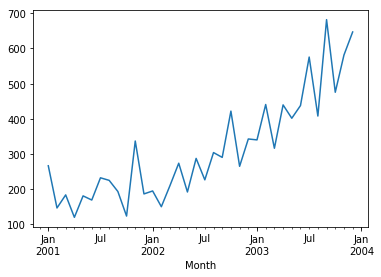

In [6]:
def parser(x):
    return datetime.strptime('200' + x, '%Y-%m')


series = read_csv(expanduser('~/Datasets/32017/sales-of-shampoo-over-a-three-ye.csv'), header=0, parse_dates=[0], index_col=0, squeeze=True,
                  date_parser=parser)
print('Shampoo sales data:\n', series.head())
print('\nShampoo sales data length: ',len(series),'\n')
series.plot()
plt.show()


Create monthly increments.

In [7]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
raw_values = series.values
diff_values = difference(raw_values,1)
print('Raw values: ',raw_values, '\nDifferencies:\n',diff_values[:10])

Raw values:  [266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9] 
Differencies:
 0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
5     63.3
6     -7.3
7    -31.7
8    -69.9
9    213.6
dtype: float64


Define main parameters.

In [8]:
n_lag = 1
n_epochs = 1000
n_batch = 4
n_neurons = 3

Convert the time series to a data set for supervized learning, i.e.  make the response column of sales increments one month ahead.

In [9]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag + 1)]
    columns.append(df)
    df = concat(columns, axis=1)
    return df
df_supervised=timeseries_to_supervised(diff_values,lag=n_lag)
df_supervised_values = df_supervised.values[n_lag:]
print(df_supervised_values[:10])

[[-120.1   37.2]
 [  37.2  -63.8]
 [ -63.8   61. ]
 [  61.   -11.8]
 [ -11.8   63.3]
 [  63.3   -7.3]
 [  -7.3  -31.7]
 [ -31.7  -69.9]
 [ -69.9  213.6]
 [ 213.6 -150.6]]


Split the supervised data into train and test. This is a time series, so test is selected as last 12 months.

In [10]:
train, test = df_supervised_values[0:-12], df_supervised_values[-12:]
print("Train: \n", train[:10], '\nTest: \n', test[:10])

Train: 
 [[-120.1   37.2]
 [  37.2  -63.8]
 [ -63.8   61. ]
 [  61.   -11.8]
 [ -11.8   63.3]
 [  63.3   -7.3]
 [  -7.3  -31.7]
 [ -31.7  -69.9]
 [ -69.9  213.6]
 [ 213.6 -150.6]] 
Test: 
 [[  77.8   -2.6]
 [  -2.6  100.7]
 [ 100.7 -124.5]
 [-124.5  123.4]
 [ 123.4  -38. ]
 [ -38.    36.1]
 [  36.1  138.1]
 [ 138.1 -167.9]
 [-167.9  274.4]
 [ 274.4 -206.7]]


Normalize train and test to range $[-1,1]$ by `MinMaxScaler`.

In [11]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
scaler, train_scaled, test_scaled = scale(train, test)
print('Train scaled: \n',train_scaled[:10],'\nTest scaled: \n',test_scaled[:10])

Train scaled: 
 [[-0.80037766  0.04828702]
 [ 0.04828702 -0.496628  ]
 [-0.496628    0.17669274]
 [ 0.17669274 -0.21607769]
 [-0.21607769  0.1891017 ]
 [ 0.1891017  -0.1917993 ]
 [-0.1917993  -0.32344214]
 [-0.32344214 -0.52953871]
 [-0.52953871  1.        ]
 [ 1.         -0.96493121]] 
Test scaled: 
 [[ 0.26733207 -0.16644187]
 [-0.16644187  0.39088211]
 [ 0.39088211 -0.82411654]
 [-0.82411654  0.51335312]
 [ 0.51335312 -0.35743189]
 [-0.35743189  0.04235231]
 [ 0.04235231  0.59266253]
 [ 0.59266253 -1.05826814]
 [-1.05826814  1.32802806]
 [ 1.32802806 -1.26760183]]


Trim the train data to skip the lag.

In [12]:
train_trimmed = train_scaled[2:, :]
print('Trimmed data:\n',train_trimmed[:10])

Trimmed data:
 [[-0.496628    0.17669274]
 [ 0.17669274 -0.21607769]
 [-0.21607769  0.1891017 ]
 [ 0.1891017  -0.1917993 ]
 [-0.1917993  -0.32344214]
 [-0.32344214 -0.52953871]
 [-0.52953871  1.        ]
 [ 1.         -0.96493121]
 [-0.96493121 -0.10709469]
 [-0.10709469 -0.39411923]]


Separate predictor and response in the supervised data.

In [13]:
X, y = train_trimmed[:, 0:-1], train_trimmed[:, -1]
print('Shape X: ',X.shape)
print('X:\n',X[:10],'\ny:\n',y[:10])

Shape X:  (20, 1)
X:
 [[-0.496628  ]
 [ 0.17669274]
 [-0.21607769]
 [ 0.1891017 ]
 [-0.1917993 ]
 [-0.32344214]
 [-0.52953871]
 [ 1.        ]
 [-0.96493121]
 [-0.10709469]] 
y:
 [ 0.17669274 -0.21607769  0.1891017  -0.1917993  -0.32344214 -0.52953871
  1.         -0.96493121 -0.10709469 -0.39411923]


Reshape $X$ into array with dimensions `(n_observations,n_steps,n_features)`, where: 

- `n_observations` is the length of the sample, i.e. number of sequences (chunks of the timeseries) in the input data; each batch contains `n_batch` number of such sequences
- `n_steps` is the number of steps in one sequence (chunk size)
- `n_features` is the number of features per each time step

Here `n_observations` is the number of rows in `X`, `n_steps` is 1 (one monthly observation at a time) and `n_features` is 1.

In [14]:
X = X.reshape(X.shape[0], 1, X.shape[1])
print(X.shape)
print('X:\n',X[:5])

(20, 1, 1)
X:
 [[[-0.496628  ]]

 [[ 0.17669274]]

 [[-0.21607769]]

 [[ 0.1891017 ]]

 [[-0.1917993 ]]]


In [16]:
X

array([[[-0.496628  ]],

       [[ 0.17669274]],

       [[-0.21607769]],

       [[ 0.1891017 ]],

       [[-0.1917993 ]],

       [[-0.32344214]],

       [[-0.52953871]],

       [[ 1.        ]],

       [[-0.96493121]],

       [[-0.10709469]],

       [[-0.39411923]],

       [[ 0.17453466]],

       [[ 0.18856218]],

       [[-0.59428109]],

       [[ 0.3633666 ]],

       [[-0.48152145]],

       [[ 0.26625303]],

       [[-0.22632857]],

       [[ 0.55813326]],

       [[-1.        ]]])

## Simple RNN

Create sequential network model with a simple RNN layer with `n_neurons` units and batch size `n_batch`.

In [17]:
input_shape = (n_batch, X.shape[1], X.shape[2])
def make_model(n_batch,n_neurons):
    model = Sequential()
    model.add(SimpleRNN(n_neurons, batch_input_shape=input_shape, stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
rnn_model=make_model(n_batch,n_neurons)
rnn_model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (4, 3)                    15        
_________________________________________________________________
dense_1 (Dense)              (4, 1)                    4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### Statefullness

Note that argument `stateful` in simple rnn layer was set to `True`. 

According to Keras documentation the meaning of `stateful` is: Boolean variable equal to `False` by default, that defines when the internal state of the network is reset. 

If `stateful=True`, then the output state for sample $i$ in a batch will be used as initial state for the corresponding sample $i$ in the next batch, i.e. states computed for the samples in one batch will be reused as initial states for the corresponding samples in the next batch. This assumes a one-to-one mapping between samples in different successive batches.

Statful model requires specification of parameter `batch_input_shape` and setting `shuffle=False` when calling `fit`.

In stateful layer internal state resets only "manually" by using `reset_state()`. Stateless layer will reset internal state after each batch.

In [20]:
rnn_model.fit(X, y, epochs=n_epochs, batch_size=n_batch, verbose=1, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.1754
Epoch 2/1000
20/20 [==============================] - 0s 844us/step - loss: 0.1724
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1690
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 6/1000
20/20 [==============================] - 0s 901us/step - loss: 0.1669
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1660
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1650
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1632
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1623
Epoch 12/1000
20/20 [==============================] - 0s 973us/step - loss: 0.1614
Epoch 13/1000
20/2

20/20 [==============================] - 0s 724us/step - loss: 0.1269
Epoch 100/1000
20/20 [==============================] - 0s 827us/step - loss: 0.1267
Epoch 101/1000
20/20 [==============================] - 0s 587us/step - loss: 0.1266
Epoch 102/1000
20/20 [==============================] - 0s 833us/step - loss: 0.1265
Epoch 103/1000
20/20 [==============================] - 0s 756us/step - loss: 0.1264
Epoch 104/1000
20/20 [==============================] - 0s 718us/step - loss: 0.1262
Epoch 105/1000
20/20 [==============================] - 0s 813us/step - loss: 0.1261
Epoch 106/1000
20/20 [==============================] - 0s 810us/step - loss: 0.1259
Epoch 107/1000
20/20 [==============================] - 0s 925us/step - loss: 0.1258
Epoch 108/1000
20/20 [==============================] - 0s 916us/step - loss: 0.1257
Epoch 109/1000
20/20 [==============================] - 0s 882us/step - loss: 0.1256
Epoch 110/1000
20/20 [==============================] - 0s 683us/step - loss: 0.

20/20 [==============================] - 0s 762us/step - loss: 0.1218
Epoch 196/1000
20/20 [==============================] - 0s 684us/step - loss: 0.1218
Epoch 197/1000
20/20 [==============================] - 0s 752us/step - loss: 0.1218
Epoch 198/1000
20/20 [==============================] - 0s 685us/step - loss: 0.1218
Epoch 199/1000
20/20 [==============================] - 0s 687us/step - loss: 0.1218
Epoch 200/1000
20/20 [==============================] - 0s 856us/step - loss: 0.1219
Epoch 201/1000
20/20 [==============================] - 0s 882us/step - loss: 0.1219
Epoch 202/1000
20/20 [==============================] - 0s 787us/step - loss: 0.1219
Epoch 203/1000
20/20 [==============================] - 0s 776us/step - loss: 0.1218
Epoch 204/1000
20/20 [==============================] - 0s 835us/step - loss: 0.1218
Epoch 205/1000
20/20 [==============================] - 0s 942us/step - loss: 0.1218
Epoch 206/1000
20/20 [==============================] - 0s 902us/step - loss: 0.

20/20 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 292/1000
20/20 [==============================] - 0s 710us/step - loss: 0.1214
Epoch 293/1000
20/20 [==============================] - 0s 946us/step - loss: 0.1214
Epoch 294/1000
20/20 [==============================] - 0s 895us/step - loss: 0.1213
Epoch 295/1000
20/20 [==============================] - 0s 877us/step - loss: 0.1213
Epoch 296/1000
20/20 [==============================] - 0s 886us/step - loss: 0.1213
Epoch 297/1000
20/20 [==============================] - 0s 749us/step - loss: 0.1212
Epoch 298/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1212
Epoch 299/1000
20/20 [==============================] - 0s 837us/step - loss: 0.1211
Epoch 300/1000
20/20 [==============================] - 0s 990us/step - loss: 0.1211
Epoch 301/1000
20/20 [==============================] - 0s 760us/step - loss: 0.1211
Epoch 302/1000
20/20 [==============================] - 0s 973us/step - loss: 0.1211

Epoch 388/1000
20/20 [==============================] - 0s 749us/step - loss: 0.1159
Epoch 389/1000
20/20 [==============================] - 0s 635us/step - loss: 0.1158
Epoch 390/1000
20/20 [==============================] - 0s 819us/step - loss: 0.1157
Epoch 391/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 392/1000
20/20 [==============================] - 0s 920us/step - loss: 0.1156
Epoch 393/1000
20/20 [==============================] - 0s 865us/step - loss: 0.1155
Epoch 394/1000
20/20 [==============================] - 0s 724us/step - loss: 0.1154
Epoch 395/1000
20/20 [==============================] - 0s 844us/step - loss: 0.1153
Epoch 396/1000
20/20 [==============================] - 0s 911us/step - loss: 0.1153
Epoch 397/1000
20/20 [==============================] - 0s 948us/step - loss: 0.1152
Epoch 398/1000
20/20 [==============================] - 0s 884us/step - loss: 0.1151
Epoch 399/1000
20/20 [==============================] - 0s 849us/st

20/20 [==============================] - 0s 693us/step - loss: 0.1115
Epoch 485/1000
20/20 [==============================] - 0s 844us/step - loss: 0.1115
Epoch 486/1000
20/20 [==============================] - 0s 962us/step - loss: 0.1115
Epoch 487/1000
20/20 [==============================] - 0s 749us/step - loss: 0.1115
Epoch 488/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1115
Epoch 489/1000
20/20 [==============================] - 0s 902us/step - loss: 0.1116
Epoch 490/1000
20/20 [==============================] - 0s 918us/step - loss: 0.1116
Epoch 491/1000
20/20 [==============================] - 0s 712us/step - loss: 0.1117
Epoch 492/1000
20/20 [==============================] - 0s 998us/step - loss: 0.1117
Epoch 493/1000
20/20 [==============================] - 0s 820us/step - loss: 0.1117
Epoch 494/1000
20/20 [==============================] - 0s 953us/step - loss: 0.1117
Epoch 495/1000
20/20 [==============================] - 0s 764us/step - loss: 0.11

20/20 [==============================] - 0s 793us/step - loss: 0.1123
Epoch 581/1000
20/20 [==============================] - 0s 776us/step - loss: 0.1123
Epoch 582/1000
20/20 [==============================] - 0s 639us/step - loss: 0.1123
Epoch 583/1000
20/20 [==============================] - 0s 1000us/step - loss: 0.1123
Epoch 584/1000
20/20 [==============================] - 0s 813us/step - loss: 0.1123
Epoch 585/1000
20/20 [==============================] - 0s 890us/step - loss: 0.1123
Epoch 586/1000
20/20 [==============================] - 0s 679us/step - loss: 0.1123
Epoch 587/1000
20/20 [==============================] - 0s 757us/step - loss: 0.1123
Epoch 588/1000
20/20 [==============================] - 0s 841us/step - loss: 0.1122
Epoch 589/1000
20/20 [==============================] - 0s 805us/step - loss: 0.1122
Epoch 590/1000
20/20 [==============================] - 0s 716us/step - loss: 0.1121
Epoch 591/1000
20/20 [==============================] - 0s 742us/step - loss: 0

20/20 [==============================] - 0s 687us/step - loss: 0.1118
Epoch 677/1000
20/20 [==============================] - 0s 894us/step - loss: 0.1118
Epoch 678/1000
20/20 [==============================] - 0s 785us/step - loss: 0.1117
Epoch 679/1000
20/20 [==============================] - 0s 815us/step - loss: 0.1116
Epoch 680/1000
20/20 [==============================] - 0s 658us/step - loss: 0.1116
Epoch 681/1000
20/20 [==============================] - 0s 805us/step - loss: 0.1115
Epoch 682/1000
20/20 [==============================] - 0s 769us/step - loss: 0.1114
Epoch 683/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1114
Epoch 684/1000
20/20 [==============================] - 0s 785us/step - loss: 0.1113
Epoch 685/1000
20/20 [==============================] - 0s 820us/step - loss: 0.1112
Epoch 686/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1112
Epoch 687/1000
20/20 [==============================] - 0s 762us/step - loss: 0.1111

20/20 [==============================] - 0s 743us/step - loss: 0.1089
Epoch 773/1000
20/20 [==============================] - 0s 837us/step - loss: 0.1089
Epoch 774/1000
20/20 [==============================] - 0s 902us/step - loss: 0.1089
Epoch 775/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1088
Epoch 776/1000
20/20 [==============================] - 0s 762us/step - loss: 0.1088
Epoch 777/1000
20/20 [==============================] - 0s 711us/step - loss: 0.1088
Epoch 778/1000
20/20 [==============================] - 0s 728us/step - loss: 0.1087
Epoch 779/1000
20/20 [==============================] - 0s 934us/step - loss: 0.1087
Epoch 780/1000
20/20 [==============================] - 0s 896us/step - loss: 0.1087
Epoch 781/1000
20/20 [==============================] - 0s 667us/step - loss: 0.1086
Epoch 782/1000
20/20 [==============================] - 0s 844us/step - loss: 0.1086
Epoch 783/1000
20/20 [==============================] - 0s 806us/step - loss: 0.10

20/20 [==============================] - 0s 812us/step - loss: 0.1048
Epoch 869/1000
20/20 [==============================] - 0s 880us/step - loss: 0.1048
Epoch 870/1000
20/20 [==============================] - 0s 724us/step - loss: 0.1047
Epoch 871/1000
20/20 [==============================] - 0s 574us/step - loss: 0.1047
Epoch 872/1000
20/20 [==============================] - 0s 783us/step - loss: 0.1047
Epoch 873/1000
20/20 [==============================] - 0s 670us/step - loss: 0.1046
Epoch 874/1000
20/20 [==============================] - 0s 710us/step - loss: 0.1046
Epoch 875/1000
20/20 [==============================] - 0s 773us/step - loss: 0.1045
Epoch 876/1000
20/20 [==============================] - 0s 890us/step - loss: 0.1045
Epoch 877/1000
20/20 [==============================] - 0s 786us/step - loss: 0.1044
Epoch 878/1000
20/20 [==============================] - 0s 825us/step - loss: 0.1044
Epoch 879/1000
20/20 [==============================] - 0s 980us/step - loss: 0.

20/20 [==============================] - 0s 724us/step - loss: 0.1010
Epoch 965/1000
20/20 [==============================] - 0s 641us/step - loss: 0.1010
Epoch 966/1000
20/20 [==============================] - 0s 729us/step - loss: 0.1010
Epoch 967/1000
20/20 [==============================] - 0s 556us/step - loss: 0.1009
Epoch 968/1000
20/20 [==============================] - 0s 634us/step - loss: 0.1009
Epoch 969/1000
20/20 [==============================] - 0s 843us/step - loss: 0.1009
Epoch 970/1000
20/20 [==============================] - 0s 650us/step - loss: 0.1009
Epoch 971/1000
20/20 [==============================] - 0s 704us/step - loss: 0.1008
Epoch 972/1000
20/20 [==============================] - 0s 671us/step - loss: 0.1008
Epoch 973/1000
20/20 [==============================] - 0s 739us/step - loss: 0.1008
Epoch 974/1000
20/20 [==============================] - 0s 865us/step - loss: 0.1008
Epoch 975/1000
20/20 [==============================] - 0s 900us/step - loss: 0.

Prepare functions inverting both differencing and scaling.

In [21]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

Prepare the test sample for validation of the trained model.

In [22]:
test_reshaped = test_scaled[:, 0:-1]
test_reshaped = test_reshaped.reshape(len(test_reshaped), 1, 1)
print('Test scaled: \n',test_scaled)
print('\nTest reshaped: \n',test_reshaped)

Test scaled: 
 [[ 0.26733207 -0.16644187]
 [-0.16644187  0.39088211]
 [ 0.39088211 -0.82411654]
 [-0.82411654  0.51335312]
 [ 0.51335312 -0.35743189]
 [-0.35743189  0.04235231]
 [ 0.04235231  0.59266253]
 [ 0.59266253 -1.05826814]
 [-1.05826814  1.32802806]
 [ 1.32802806 -1.26760183]
 [-1.26760183  0.41947667]
 [ 0.41947667  0.20151066]]

Test reshaped: 
 [[[ 0.26733207]]

 [[-0.16644187]]

 [[ 0.39088211]]

 [[-0.82411654]]

 [[ 0.51335312]]

 [[-0.35743189]]

 [[ 0.04235231]]

 [[ 0.59266253]]

 [[-1.05826814]]

 [[ 1.32802806]]

 [[-1.26760183]]

 [[ 0.41947667]]]


Predict the test sample.

In [23]:
output = rnn_model.predict(test_reshaped, batch_size=n_batch)
print('Output: \n',output)

Output: 
 [[-0.27075866]
 [-0.12354854]
 [-0.18669033]
 [ 0.27875027]
 [-0.36030722]
 [-0.07209806]
 [ 0.15974495]
 [-0.6981075 ]
 [ 0.28168747]
 [-1.0100031 ]
 [ 0.43035296]
 [-0.6711595 ]]


Unscale and undifference predictions to transform them to the original units of the data.

In [24]:
predictions = list()
for i in range(len(output)):
    yhat = output[i, 0]
    X = test_scaled[i, 0:-1]
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled) + 1 - i)
    # store forecast
    predictions.append(yhat)
print('Raw values and predictions:\n',np.column_stack((raw_values[-12:],predictions)))

Raw values and predictions:
 [[339.7        320.36488262]
 [440.4        345.05027858]
 [315.9        434.04694724]
 [439.3        395.81636266]
 [401.3        400.76705739]
 [437.4        416.18662431]
 [575.5        495.25872614]
 [407.6        474.3557784 ]
 [682.         488.06077225]
 [475.3        523.04592729]
 [581.3        583.31592041]
 [646.9        485.15058559]]


Plot the time series and forecasts.

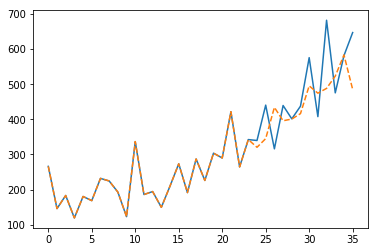

In [25]:
predict_plot_data=np.empty_like(raw_values)
predict_plot_data[:]=raw_values
predict_plot_data[-12:]=predictions

plt.plot(raw_values)
plt.plot(predict_plot_data,'--')
plt.show()

## LSTM

Predict the same time series using the same general structure of the model, but with `LSTM` layer instead of `SimpleRNN`.

In [21]:
X, y = train_trimmed[:, 0:-1], train_trimmed[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])
print(X.shape)
print('X:\n',X[:5])
print(n_batch, X.shape[1],X.shape[2])

(20, 1, 1)
X:
 [[[-0.496628  ]]

 [[ 0.17669274]]

 [[-0.21607769]]

 [[ 0.1891017 ]]

 [[-0.1917993 ]]]
4 1 1


In [22]:
input_shape = (n_batch, X.shape[1], X.shape[2])
def make_model_lstm(n_batch,n_neurons):
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=input_shape, stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
lstm_model=make_model_lstm(n_batch,n_neurons)
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
lstm_model.fit(X, y, epochs=n_epochs, batch_size=n_batch, verbose=1, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 1s 26ms/step - loss: 0.2445
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2428
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2397
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2376
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2348
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2338
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2329
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2321
Epoch 10/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2313
Epoch 11/1000
20/20 [==============================] - 0s 933us/step - loss: 0.2306
Epoch 12/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2300
Epoch 13/1000
20/20 [=

20/20 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 198/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 199/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1588
Epoch 200/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1585
Epoch 201/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1582
Epoch 202/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 203/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1577
Epoch 204/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1575
Epoch 205/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1572
Epoch 206/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1570
Epoch 207/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 208/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1565
Epoch 209/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.1429
Epoch 393/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1429
Epoch 394/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1428
Epoch 395/1000
20/20 [==============================] - 0s 998us/step - loss: 0.1428
Epoch 396/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 397/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 398/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 399/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1426
Epoch 400/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1426
Epoch 401/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1426
Epoch 402/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 403/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 404/1000
20

20/20 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 589/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1384
Epoch 590/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 591/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 592/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1384
Epoch 593/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1384
Epoch 594/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1384
Epoch 595/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 596/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 597/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 598/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1383
Epoch 599/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1383
Epoch 600/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.1362
Epoch 785/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 786/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 787/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 788/1000
20/20 [==============================] - ETA: 0s - loss: 0.025 - 0s 2ms/step - loss: 0.1362
Epoch 789/1000
20/20 [==============================] - ETA: 0s - loss: 0.025 - 0s 1ms/step - loss: 0.1362
Epoch 790/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1361
Epoch 791/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 792/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 793/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1360
Epoch 794/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1360
Epoch 795/1000
20/20 [==============================] 

20/20 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 980/1000
20/20 [==============================] - ETA: 0s - loss: 0.021 - 0s 2ms/step - loss: 0.1227
Epoch 981/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 982/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1227
Epoch 983/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1227
Epoch 984/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 985/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 986/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 987/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1227
Epoch 988/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1227
Epoch 989/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 990/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.

In [24]:
output = lstm_model.predict(test_reshaped, batch_size=n_batch)
print('Output: \n',output)

Output: 
 [[-0.41696888]
 [-0.01774305]
 [-0.55168366]
 [ 0.33073586]
 [-0.60371774]
 [ 0.11038834]
 [-0.27743697]
 [-0.52189624]
 [ 0.36810184]
 [-1.1158005 ]
 [ 0.43784678]
 [-0.55526203]]


In [25]:
lstm_predictions = list()
for i in range(len(output)):
    yhat = output[i, 0]
    X = test_scaled[i, 0:-1]
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled) + 1 - i)
    # store forecast
    lstm_predictions.append(yhat)
print('Raw values and predictions:\n',np.column_stack((raw_values[-12:],
                                                       predictions,
                                                       lstm_predictions)))

Raw values and predictions:
 [[ 339.7         299.50210683  293.26481771]
 [ 440.4         367.97440718  364.66132549]
 [ 315.9         390.62582461  366.39543282]
 [ 439.3         365.65181739  405.45189207]
 [ 401.3         331.96023861  355.65091608]
 [ 437.4         442.44412927  450.01047855]
 [ 575.5         446.17140145  414.2270573 ]
 [ 407.6         444.36702723  507.01653134]
 [ 682.          560.30882905  504.07767516]
 [ 475.3         458.60333388  503.43637734]
 [ 581.3         621.79847427  584.70490064]
 [ 646.9         541.25856844  506.63218289]]


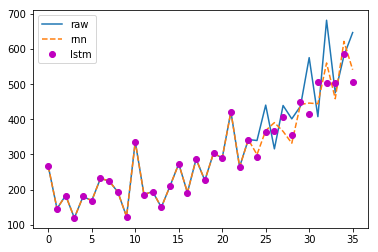

In [26]:
predict_plot_data=np.empty_like(raw_values)
predict_plot_data[:]=raw_values
predict_plot_data[-12:]=predictions

predict_lstm_plot_data=np.empty_like(raw_values)
predict_lstm_plot_data[:]=raw_values
predict_lstm_plot_data[-12:]=lstm_predictions

plt.plot(raw_values)
plt.plot(predict_plot_data,'--')
plt.plot(predict_lstm_plot_data,'mo')
plt.gca().legend(('raw','rnn','lstm'))
plt.show()